<a href="https://colab.research.google.com/github/swypar/PROJECTS/blob/main/Acquiring%2C_Developing%2C_Assessing_%26_Exploring_negative_reviews_on_Amazon_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Acquiring at least 2000 reviews for a product sold on Amazon that has at least 5% negative reviews. 
2. Developing a 2-layer (100,100) fully-connected neural network model using 100-dimension embedding input pre-processing layer.

3. Assessing model performance

4. Exploring the effects of varying review length (200, 300, 500) and dimensions (100,200,300) on model performance. 

In [ ]:
#Downloading & installing dependencies

!pip install scrapy
!pip install selenium
!pip install selenium-stealth
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

     |████████████████████████████████| 256kB 17.8MB/s 
     |████████████████████████████████| 3.2MB 40.9MB/s 
     |████████████████████████████████| 256kB 45.7MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 3.1MB 34.8MB/s 
     |████████████████████████████████| 3.2MB 40.6MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
  Created wheel for protego: filename=Protego-0.1.16-cp37-none-any.whl size=7766 sha256=0a6a934b6176f4ee08d0ca70addbeb695c64c135ac76fb082510338da3f6a1e3
  Stored in directory: /root/.cache/pip/wheels/51/01/d1/4a2286a976dccd025ba679acacfe37320540df0f2283ecab12
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-cp37-none-any.whl size=11517 sha256=c4614621fe3c155be8223243bdda6b4b3474013576cf1c2c9b466a5f2df1f40d
  Stored in directory: /root/.cache/pip/wheels/88/99/96/cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
Successfully built protego P

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from scrapy import Selector
from selenium_stealth import stealth
import os
import csv
import time
import random


FIELD_NAMES = ['review_date', 'handle', 'rating', 'helpfulness_rating', 'review']

def writeCSV(data, fieldName, FILE_NAME):
    fileExists = os.path.isfile(FILE_NAME)
    with open(FILE_NAME, 'a', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldName, lineterminator='\n')
        if not fileExists:
            writer.writeheader()
        writer.writerow(data)

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
chrome_options.add_experimental_option('useAutomationExtension', False)
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.set_window_size(1920, 1080)

stealth(driver,
        languages=["en-US", "en"],
        vendor="Google Inc.",
        platform="Win32",
        webgl_vendor="Intel Inc.",
        renderer="Intel Iris OpenGL Engine",
        fix_hairline=True,
        )
product_url = 'https://www.amazon.com/Blink-Outdoor-Wireless-Security-Camera/dp/B086DKSYTS/ref=sr_1_7?dchild=1&keywords=bling+camera&qid=1618365303&sr=8-7' 


#driver.get(input("Enter the URL: "))
driver.get(product_url)

try:
  WebDriverWait(driver, 5).until(EC.visibility_of_element_located((By.XPATH, "(//a[text()='See all reviews'])")))
except:
  pass

html = driver.page_source
respObj = Selector(text=html)
FILE_NAME = f'''{respObj.xpath("normalize-space(//h1/span[@id='productTitle']/text())").get().replace(" ","_").lower()}.csv'''
all_review_url = f'''https://www.amazon.com{respObj.xpath("(//a[text()='See all reviews'])[1]/@href").get()}'''
driver.get(all_review_url)
try:
  WebDriverWait(driver, 5).until(EC.visibility_of_element_located((By.XPATH, "//div[@data-hook='review']")))
except:
  pass
cntr = 1
while True:
  html = driver.page_source
  respObj = Selector(text=html)
  # f = open("test.html", "w")
  # f.write(html)
  # f.close()
  if not respObj.xpath("//div[@data-hook='review']"):
    break
  cntr += 1
  reviews = respObj.xpath("//div[@data-hook='review']")
  for review in reviews:
    reviewDate = review.xpath("normalize-space(.//span[@data-hook='review-date']/text())").get()
    rating = review.xpath(".//i[@data-hook='review-star-rating']/span/text()").get()
    helpfulness_rating = review.xpath("normalize-space(.//span[@data-hook='helpful-vote-statement']/text())").get()
    reviewDesc = review.xpath(".//span[@data-hook='review-body']//span/text()").getall()
    try:
      rating = rating.split(" ")[0]
    except:
      pass
    data = {
        FIELD_NAMES[0]: " ".join(reviewDate.split(" ")[-3:]),
        FIELD_NAMES[1]: review.xpath("normalize-space(.//span[contains(@class, 'profile-name')]/text())").get(),
        FIELD_NAMES[2]: rating,
        FIELD_NAMES[3]: helpfulness_rating.split(" ")[0].replace(",",""),
        FIELD_NAMES[4]: " ".join(revLines.strip() for revLines in reviewDesc if revLines)
    }
    print(data)

    writeCSV(data, FIELD_NAMES, FILE_NAME)
    data.clear()

  driver.get(f'{all_review_url}&pageNumber={cntr}')
  time.sleep(random.randint(1,4))

driver.quit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: use options instead of chrome_options


Streaming output truncated to the last 5000 lines.
{'review_date': 'September 17, 2020', 'handle': 'BrandonRyan', 'rating': '1.0', 'helpfulness_rating': '2875', 'review': "Passed, not interested in paying $120 a year. Xt2's have no fees. Thus the reason why I bought them."}
{'review_date': 'September 18, 2020', 'handle': 'The Truth', 'rating': '5.0', 'helpfulness_rating': '1747', 'review': "We've got some bad actors in the hood, so it was time to catch them with some irrefutable evidence. Our XT2 is a little old and our Arlos are acting stupid. Saw this come out and had to give it a shot. It was time to upgrade. Plus, the specs of the possibility of TWO YEAR BATTERY LIFE is mindblowing. It's probably a lot less, but my Arlos would last a week with $10 CR123 batteries, so that had to go. Anything had to be better than those dinosaurs. Set up was fairly easy. There is no real printed instruction manual, but those are rare today. Scanned the QR code and my smartphone popped me to their we

In [ ]:
import pandas as pd

reviews = pd.read_csv('blink_outdoor_–_wireless,_weather-resistant_hd_security_camera_with_two-year_battery_life_and_motion_detection_–_1_camera_kit.csv')

In [ ]:
reviews.head()

,review_date,handle,rating,helpfulness_rating,review
0,"September 17, 2020",BrandonRyan,1.0,2875,"Passed, not interested in paying $120 a year. ..."
1,"September 18, 2020",The Truth,5.0,1747,"We've got some bad actors in the hood, so it w..."
2,"September 18, 2020",BrainyBrownGirl,3.0,1300,Pros: 1. Quality HD picture 2. Easy to set up ...
3,"September 18, 2020",Jacquelyn,1.0,1080,Worst security camera i ever bought in my life...
4,"September 18, 2020",TBD,1.0,777,"Had high hopes for this product, so the letdow..."


In [ ]:
reviews.drop(columns=['review_date','handle','helpfulness_rating'], inplace=True)

In [ ]:
reviews.head()

,rating,review
0,1.0,"Passed, not interested in paying $120 a year. ..."
1,5.0,"We've got some bad actors in the hood, so it w..."
2,3.0,Pros: 1. Quality HD picture 2. Easy to set up ...
3,1.0,Worst security camera i ever bought in my life...
4,1.0,"Had high hopes for this product, so the letdow..."


In [ ]:
reviews.tail()

,rating,review
4995,5.0,"Excellent, in other words perfect! Easy to ins..."
4996,4.0,"I researched many cameras and chose the Blink,..."
4997,5.0,I loved these cameras. I am so happy with them...
4998,5.0,Awesome security system.. High quality picture...
4999,1.0,"demanding to install,, also thought i could op..."


In [ ]:
reviews['rating_bin'] = reviews['rating'].apply(lambda x: 1 if x > 3 else 0)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='OOV')
tokenizer.fit_on_texts(reviews['review'])

In [ ]:
tokenizer.word_index

{'OOV': 1,
 'the': 2,
 'to': 3,
 'i': 4,
 'and': 5,
 'a': 6,
 'is': 7,
 'it': 8,
 'of': 9,
 'camera': 10,
 'for': 11,
 'have': 12,
 'my': 13,
 'you': 14,
 'not': 15,
 'cameras': 16,
 'that': 17,
 'in': 18,
 'on': 19,
 'this': 20,
 'with': 21,
 'but': 22,
 'up': 23,
 'they': 24,
 'was': 25,
 'are': 26,
 'so': 27,
 'blink': 28,
 'motion': 29,
 'be': 30,
 'if': 31,
 'at': 32,
 'great': 33,
 'system': 34,
 'night': 35,
 'as': 36,
 'very': 37,
 'easy': 38,
 'these': 39,
 'good': 40,
 'can': 41,
 'when': 42,
 'all': 43,
 'will': 44,
 'or': 45,
 'set': 46,
 'them': 47,
 'one': 48,
 'no': 49,
 'get': 50,
 'we': 51,
 'time': 52,
 'had': 53,
 'would': 54,
 'work': 55,
 'from': 56,
 'only': 57,
 'just': 58,
 'vision': 59,
 'out': 60,
 'me': 61,
 'like': 62,
 '2': 63,
 'quality': 64,
 'your': 65,
 'an': 66,
 'video': 67,
 'there': 68,
 'app': 69,
 'works': 70,
 'battery': 71,
 'use': 72,
 'do': 73,
 'about': 74,
 'batteries': 75,
 'even': 76,
 'more': 77,
 'see': 78,
 'wifi': 79,
 'what': 80,
 'mo

In [ ]:
sequences = tokenizer.texts_to_sequences(reviews.head()['review'])
print(sequences)

[[1632, 15, 2096, 18, 874, 1559, 6, 198, 1767, 12, 49, 727, 1706, 2, 421, 313, 4, 99, 47], [1319, 149, 137, 207, 1, 18, 2, 3275, 27, 8, 25, 52, 3, 391, 47, 21, 137, 1, 2629, 107, 263, 7, 6, 185, 335, 5, 107, 3276, 26, 3277, 1157, 943, 20, 320, 60, 5, 53, 3, 265, 8, 6, 988, 8, 25, 52, 3, 1029, 522, 2, 2630, 9, 2, 2909, 9, 98, 198, 71, 141, 7, 1, 116, 448, 6, 224, 287, 22, 13, 3276, 54, 157, 6, 338, 21, 172, 1, 75, 27, 17, 53, 3, 170, 229, 53, 3, 30, 92, 95, 422, 1, 46, 23, 25, 711, 38, 68, 7, 49, 484, 1, 1500, 1158, 22, 422, 26, 2249, 670, 3278, 2, 962, 747, 5, 13, 2250, 3279, 61, 3, 159, 1177, 21, 2631, 9, 2910, 1123, 5, 76, 134, 220, 2, 712, 134, 908, 7, 962, 56, 2, 102, 93, 81, 63, 3, 2, 10, 832, 27, 127, 179, 2, 1560, 9, 1, 2, 75, 18, 5, 2405, 2, 10, 436, 62, 4, 161, 195, 4, 3278, 2, 962, 747, 1, 328, 287, 95, 480, 331, 3, 134, 5, 93, 2911, 23, 11, 6, 102, 28, 367, 27, 2, 335, 48, 400, 50, 2406, 522, 569, 317, 307, 9, 285, 205, 136, 200, 88, 2912, 46, 8, 23, 18, 6, 923, 1007, 56, 13

In [ ]:
padded = pad_sequences(sequences, padding='post')
print(padded)

[[1632   15 2096 ...    0    0    0]
 [1319  149  137 ... 1451   42  657]
 [ 748  169   64 ...    0    0    0]
 [ 683   94   10 ...    0    0    0]
 [  53  227 1360 ...    0    0    0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reviews['review'], reviews['rating_bin'], test_size=0.33, random_state=101)

In [ ]:
vocab_size = 5000
embedding_dim = 100
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"


tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)
testing_sequences = tokenizer.texts_to_sequences(X_test)


padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)  # 
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)  # 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          500000    
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2000100   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 2,500,201
Trainable params: 2,500,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 100
history = model.fit(padded, y_train, epochs=num_epochs, validation_data=(testing_padded, y_test))

Epoch 1/100
105/105 [==============================] - 5s 37ms/step - loss: 0.6476 - accuracy: 0.6285 - val_loss: 0.4346 - val_accuracy: 0.8085
Epoch 2/100
105/105 [==============================] - 3s 33ms/step - loss: 0.3020 - accuracy: 0.8820 - val_loss: 0.3898 - val_accuracy: 0.8406
Epoch 3/100
105/105 [==============================] - 3s 32ms/step - loss: 0.0907 - accuracy: 0.9737 - val_loss: 0.4449 - val_accuracy: 0.8364
Epoch 4/100
105/105 [==============================] - 3s 32ms/step - loss: 0.0251 - accuracy: 0.9965 - val_loss: 0.5195 - val_accuracy: 0.8242
Epoch 5/100
105/105 [==============================] - 3s 31ms/step - loss: 0.0140 - accuracy: 0.9979 - val_loss: 0.5905 - val_accuracy: 0.8236
Epoch 6/100
105/105 [==============================] - 3s 32ms/step - loss: 0.0079 - accuracy: 0.9984 - val_loss: 0.6528 - val_accuracy: 0.8121
Epoch 7/100
105/105 [==============================] - 3s 31ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.6837 - val_accuracy:

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)


reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

(5000, 100)


In [ ]:
embedding_df = pd.DataFrame()
for word_num in range(1, vocab_size):
  try:
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    embedding_df = embedding_df.append(pd.Series({'word':word, 'em':embeddings}), ignore_index=True)
  except:
    pass
embedding_df = pd.concat([embedding_df['em'].apply(pd.Series), embedding_df['word']], axis=1)

In [ ]:
p = PCA(n_components=3)
principal_components = p.fit_transform(embedding_df.filter(regex=r'\d'))
embedding_df[['x', 'y', 'z']] = pd.DataFrame(principal_components)

embedding_df.shape

(4999, 104)

In [ ]:
fig = px.scatter_3d(embedding_df, x='x', y='y', z='z', hover_name='word', color='x')
fig.show()

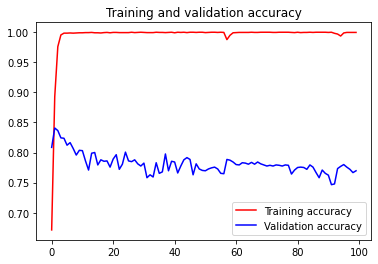

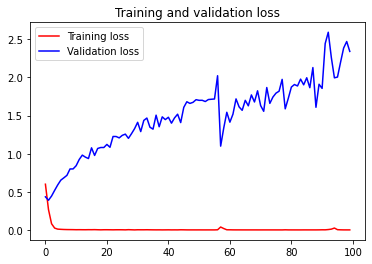

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()